In [35]:
from autograd import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime

Testing Cosine similiarity

Michael created two functions: f(x,y) = x and g(x,y)= y. Their gradients are clearly orthogonal:

    [1,0]*[0,1].T = 0

, but our cosine similarity function returns 1. I believe this occurs because our grad_finite diff function 
returns a real number instead of a vector in R^2. Is there a bug in grad_finite_diff or am I inputting the functions incorrectly
into the program?

In [21]:
eps = np.random.multivariate_normal(np.zeros((12,)),np.identity(12*0.1)

layer = np.ones((7,12))
print(layer)

#layer_eps = np.add(layer,eps)
print(layer_eps.shape)

SyntaxError: invalid syntax (<ipython-input-21-7f60ffee05c2>, line 3)

In [5]:
# def grad_finite_diff(f, x): # f : R2 -> R, x in R2
#     # f is a vectorized function, x is a vector
#     dx = np.random.normal(0, 0.1, size = (1,2)) #see LUNA paper, appendix B.1
#     print('dx', dx)
#     print(f"(x+dx): {x+dx}")
#     y2 = f(x + dx)
#     y1 = f(x)
#     print('ding', y1, y2)
#     return (y2 - y1)/dx

def cos_sim_sq(fi, fj, x): 

    grad_i = approx_fprime(x, fi, epsilon = np.random.normal(0, 0.1, size = x.shape))
    grad_j = approx_fprime(x, fj, epsilon = np.random.normal(0, 0.1, size = x.shape))
    print(grad_j)
    numerator = np.dot(grad_i, grad_j.T)**2
    denominator = np.dot(grad_i, grad_i.T) * np.dot(grad_j, grad_j.T)
    frac = numerator/denominator
    return frac

def fi(p): # from R2 to R
    return p[0]

def fj(p): # from R2 to R
    return p[1]

test_point = np.array([1.,0.])

print(cos_sim_sq(fi,fj,test_point))

[-0.  1.]
0.0


### Vizualising functions

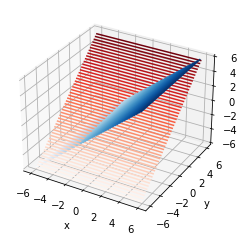

In [ ]:
from matplotlib import cm
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X,Y = np.meshgrid(x, y)

def f1a(x,y):
    return x 

def f2a(x,y):
    return y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f1a(X,Y), 50, cmap=cm.get_cmap('Blues'))
ax.contour3D(X, Y, f2a(X,Y), 50, cmap=cm.get_cmap('Reds'))
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z')
#ax.set_title('3D contour')
plt.show()

In [28]:

def default_finite_diff(f, x):
    '''
    aux_w is the weights of an aux function from R^D to R
    x is the input
    '''
    
    D = x.shape[0]
    eps = np.random.normal(0,0.1)

    out = np.zeros((D,))
    eps = np.random.normal(0,0.1)
    for i in range(D):
        can = np.zeros((D,))
        can[i] = eps
        #f_x_plus_eps = np.dot(aux_w, x + can)
        #f_x = np.dot(aux_w, x)
        out[i] = (f(x+can) - f(x)) / eps
    return out

#aux_w = np.array((2,3))
def f(x):
    return x[0]**2+2*x[1]**2
x = np.array((1,1))
default_finite_diff(f,x)

array([2.04868077, 4.09736154])

In [ ]:
class dumb_NN():

    def __init__(D_in,D_out,ff):
        self.D_in = D_in
        self.D_out = D_out
        self.ff = ff
        
    def default_finite_diff(self, W,x):
        '''
        x.shape[0] is # of dimensions
        x.shape[1] is # of observations

        output: Returns a 3d matrix:
                (in dimension) x (out dimension (# of aux functions)) x (# observations)
        '''
        
        #create one epsilon for each observation
        eps = np.random.normal(0,0.1,size=x.shape[1])

        #iterate over features of raw input data (rows of x)
        out = np.zeros((self.D_in, self.D_out, x.shape[1]))
        print(out.shape)

        #evaluate function at x
        f_x = self.ff.forward(W, x)

        #for one dimension at a time
        for i in range(x.shape[0]):

            delta = np.zeros(x.shape)
            delta[i,:] = eps

            f_eps = self.ff.forward(W,x+delta) # 1 x 5 x 12

            # out dim X #obs
            out[i,:,:] = (f_eps - f_ex)/eps # value wise division, different epsilon for each column 

        return out

    

Testing rediculous matrix multiplication

In [36]:
a = np.ones((2,3,10))
d = np.array([1/x for x in range(1,11)])

a[0,:,:] = np.zeros((3,10))

print(a)
print(d)
print(a/d)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]
[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]
[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]]


In [30]:
a[0]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])